##**DSC Lab Assignment - 9**

---
---

Name - Rajat Goyal\
Roll No. - 197267\
Section - B



1. Implement Principal Component Analysis from scratch in Python for the following dataset and show the
following steps below.\
    a. Dataset: https://archive.ics.uci.edu/ml/datasets/iris \
    b. Scale the dataset.\
    c. Calculate the covariance matrix for the features in the dataset.\
    d. Calculate the eigenvalues and eigenvectors for the covariance matrix.\
    e. Sort eigenvalues and their corresponding eigenvectors.\
    f. Plot the principal components and percentage of explained variances.\
    g. Choose first k eigen vectors.\
    h. Transform the original matrix.

In [ ]:
# Implementation PCA
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

# PART A
df = pd.read_csv("/content/drive/MyDrive/197267-DSc-9/Iris.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# variable used
# Independent variable = All col - {Species} = X
# Dependent variable = Species = Y

X, Y = df.drop(columns = ["Id", "Species"]), df['Species']
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Independent Features  Shape : ",X.shape)

for i in range(len(Y)):
  if Y.iat[i] == "Iris-setosa":
    Y.iat[i] = 0
  if Y.iat[i] == "Iris-versicolor":
    Y.iat[i] = 1
  if Y.iat[i] == "Iris-virginica":
    Y.iat[i] = 2
print("Dependent Feature Shape : ",Y.shape)

Independent Features  Shape :  (150, 4)
Dependent Feature Shape :  (150,)


In [ ]:
#Calculating the covariance matrix for the features in the dataset
def get_covariance_matrix(x):
    n = x.shape[0]
    C = np.dot(x.T, x) / (n)
    return C

Cov = get_covariance_matrix(X)

print(Cov.shape)
print(Cov)

(4, 4)
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [ ]:
# Calculating the eigenvalues and eigenvectors for the covariance matrix
def get_eigenvectors(C):
    # calculating eigenvalues & eigenvectors of covariance matrix 'C'
    eigenvalues, eigenvectors = np.linalg.eig(C)
    print("Eigen Values : ",eigenvalues)
    print("Eigen Vector :\n",eigenvectors)
    
    # sort eigenvalues descending and select columns based on n_components
    n_cols = np.flip(np.argsort(eigenvalues))
    selected_vectors = eigenvectors[:, n_cols]
    return np.flip(np.sort(eigenvalues)),selected_vectors

eigenvalues,eigenvectors = get_eigenvectors(Cov)

print("\nSorted Eigen Values : ",eigenvalues)
print("Sorted Eigen Vector :\n",eigenvectors)

Eigen Values :  [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen Vector :
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Sorted Eigen Values :  [2.91081808 0.92122093 0.14735328 0.02060771]
Sorted Eigen Vector :
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [ ]:
#Plot the principal components and percentage of explained variances.
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))
 
print("Sum of  Explained Variance :",np.sum(explained_variances))
print("Explained Variance :", explained_variances)

Sum of  Explained Variance : 1.0
Explained Variance : [0.7277045209380139, 0.23030523267680594, 0.036838319576273884, 0.00515192680890635]


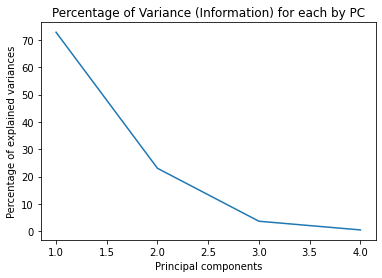

In [ ]:
#Plot the principal components and percentage of explained variances.
import matplotlib.pyplot as plt
x = [1,2,3,4]
q = []
for i in explained_variances:
    q.append(i*100)
plt.plot(x,q)
plt.xlabel('Principal components')
plt.ylabel('Percentage of explained variances')
plt.title('Percentage of Variance (Information) for each by PC')
plt.show()

In [ ]:
#consider only the features upto where the pov adds to <95% here 2
k = 2
eisub = eigenvectors[:,0:k]
eisub

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [ ]:
X_transformed = np.dot(eisub.T,X.T).T
print("Transformed X :\n", np.around(X_transformed, 2))

Transformed X :
 [[-2.26 -0.51]
 [-2.09  0.66]
 [-2.37  0.32]
 [-2.3   0.58]
 [-2.39 -0.67]
 [-2.07 -1.52]
 [-2.45 -0.07]
 [-2.23 -0.25]
 [-2.34  1.1 ]
 [-2.19  0.45]
 [-2.16 -1.07]
 [-2.33 -0.16]
 [-2.22  0.71]
 [-2.64  0.94]
 [-2.19 -1.89]
 [-2.25 -2.72]
 [-2.2  -1.51]
 [-2.19 -0.51]
 [-1.89 -1.43]
 [-2.34 -1.16]
 [-1.91 -0.43]
 [-2.2  -0.95]
 [-2.77 -0.49]
 [-1.82 -0.11]
 [-2.23 -0.16]
 [-1.96  0.61]
 [-2.05 -0.27]
 [-2.17 -0.55]
 [-2.14 -0.34]
 [-2.27  0.31]
 [-2.14  0.48]
 [-1.83 -0.45]
 [-2.61 -1.83]
 [-2.44 -2.19]
 [-2.19  0.45]
 [-2.21  0.18]
 [-2.04 -0.68]
 [-2.19  0.45]
 [-2.44  0.88]
 [-2.17 -0.29]
 [-2.29 -0.47]
 [-1.87  2.33]
 [-2.56  0.45]
 [-1.96 -0.5 ]
 [-2.13 -1.17]
 [-2.08  0.69]
 [-2.38 -1.15]
 [-2.4   0.36]
 [-2.23 -1.03]
 [-2.21 -0.03]
 [ 1.1  -0.86]
 [ 0.73 -0.6 ]
 [ 1.24 -0.61]
 [ 0.4   1.76]
 [ 1.07  0.21]
 [ 0.38  0.59]
 [ 0.75 -0.78]
 [-0.5   1.85]
 [ 0.93 -0.03]
 [ 0.    1.03]
 [-0.12  2.66]
 [ 0.44  0.06]
 [ 0.55  1.77]
 [ 0.72  0.19]
 [-0.04  0.43]
 [ 0.88 

2. Implement PCA and Logistic Regression for the following dataset by performing the required steps.\
a. Dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression \
b. Loading the dataset\
c. Scale the dataset\
d. Select the principal components\
e. Build the Logistic regression model with the transformed dataset.

In [ ]:
#importing the dataset
import pandas as pd
import numpy as np
df = pd.read_csv(r"/content/drive/MyDrive/197267-DSc-9/framingham.csv")
#drop nan values
df = df.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
# variable used
# Independent variable = All col - {TenYearCHD} = X
# Dependent variable = TenYearCHD = Y

X, Y = df.drop(columns = ["TenYearCHD"]), df['TenYearCHD']
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Independent Features  Shape : ",X.shape)

print("Dependent Feature Shape : ",Y.shape)

Independent Features  Shape :  (3656, 15)
Dependent Feature Shape :  (3656,)


In [ ]:
#Calculating the covariance matrix for the features in the dataset
def get_covariance_matrix(x):
    n = x.shape[0]
    C = np.dot(x.T, x) / (n)
    return C

Cov = get_covariance_matrix(X)

print(Cov.shape)
print(np.around(Cov,3))

(15, 15)
[[ 1.    -0.024  0.018  0.207  0.331 -0.052 -0.002  0.001  0.014 -0.07
  -0.045  0.052  0.073 -0.115  0.003]
 [-0.024  1.    -0.159 -0.211 -0.189  0.135  0.051  0.307  0.109  0.268
   0.389  0.209  0.137 -0.003  0.118]
 [ 0.018 -0.159  1.     0.025  0.014 -0.014 -0.03  -0.079 -0.04  -0.013
  -0.125 -0.059 -0.137 -0.064 -0.032]
 [ 0.207 -0.211  0.025  1.     0.774 -0.052 -0.038 -0.108 -0.042 -0.051
  -0.134 -0.116 -0.16   0.05  -0.053]
 [ 0.331 -0.189  0.014  0.774  1.    -0.046 -0.036 -0.07  -0.037 -0.03
  -0.095 -0.057 -0.087  0.064 -0.054]
 [-0.052  0.135 -0.014 -0.052 -0.046  1.     0.113  0.263  0.049  0.094
   0.271  0.2    0.106  0.013  0.054]
 [-0.002  0.051 -0.03  -0.038 -0.036  0.113  1.     0.066  0.01   0.013
   0.061  0.056  0.036 -0.017  0.016]
 [ 0.001  0.307 -0.079 -0.108 -0.07   0.263  0.066  1.     0.081  0.167
   0.698  0.618  0.303  0.147  0.087]
 [ 0.014  0.109 -0.04  -0.042 -0.037  0.049  0.01   0.081  1.     0.048
   0.103  0.051  0.089  0.061  0.615]
 [-

In [ ]:
# Calculating the eigenvalues and eigenvectors for the covariance matrix
def get_eigenvectors(C):
    # calculating eigenvalues & eigenvectors of covariance matrix 'C'
    eigenvalues, eigenvectors = np.linalg.eig(C)
    print("Eigen Values : ", np.around(eigenvalues, 3))
    print("Eigen Vector :\n", np.around(eigenvectors,3))
    
    # sort eigenvalues descending and select columns based on n_components
    n_cols = np.flip(np.argsort(eigenvalues))
    selected_vectors = eigenvectors[:, n_cols]
    return np.flip(np.sort(eigenvalues)),selected_vectors

eigenvalues,eigenvectors = get_eigenvectors(Cov)

print("\nSorted Eigen Values : ", np.around(eigenvalues,3))
print("Sorted Eigen Vector :\n", np.around(eigenvectors,3))

Eigen Values :  [3.229 1.884 1.568 0.172 0.212 0.376 0.391 0.584 0.692 0.791 0.872 1.12
 1.007 1.058 1.045]
Eigen Vector :
 [[ 0.055 -0.364  0.043 -0.077 -0.125 -0.024 -0.022  0.273  0.595 -0.007
   0.182 -0.528  0.171  0.263 -0.027]
 [-0.295  0.096  0.026  0.151  0.001  0.092  0.06  -0.593  0.25  -0.334
  -0.077 -0.122  0.244 -0.01   0.512]
 [ 0.107  0.017 -0.031 -0.036  0.003  0.014 -0.003 -0.309  0.056 -0.05
   0.292  0.004  0.546 -0.417 -0.573]
 [ 0.2   -0.588  0.051  0.024 -0.681 -0.005  0.024 -0.178 -0.241 -0.033
  -0.096  0.11  -0.017 -0.137  0.122]
 [ 0.169 -0.633  0.043  0.008  0.719  0.02   0.014 -0.134 -0.118  0.01
  -0.03   0.035  0.007 -0.065  0.113]
 [-0.209 -0.043 -0.053  0.037 -0.002  0.051  0.046  0.015  0.301  0.493
  -0.539 -0.147 -0.089 -0.54  -0.027]
 [-0.068  0.017 -0.027 -0.009  0.002  0.006 -0.004 -0.008 -0.06  -0.16
   0.531 -0.342 -0.541 -0.507  0.124]
 [-0.43  -0.16  -0.121  0.147  0.01  -0.583 -0.571  0.065 -0.082 -0.212
  -0.106 -0.012  0.022 -0.029 -0.135]

In [ ]:
#Plot the principal components and percentage of explained variances.
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))
 
print("Sum of  Explained Variance :",np.sum(explained_variances))
print("Explained Variance :", np.around(explained_variances, 3))

Sum of  Explained Variance : 1.0
Explained Variance : [0.215 0.126 0.105 0.075 0.071 0.07  0.067 0.058 0.053 0.046 0.039 0.026
 0.025 0.014 0.011]


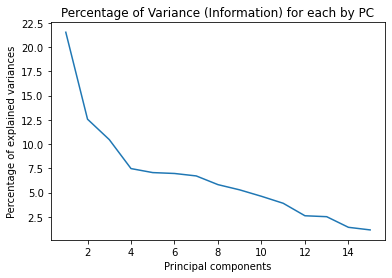

In [ ]:
#Plot the principal components and percentage of explained variances.
import matplotlib.pyplot as plt
x = [i for i in range(1,16)]
q = []
for i in explained_variances:
    q.append(i*100)
plt.plot(x,q)
plt.xlabel('Principal components')
plt.ylabel('Percentage of explained variances')
plt.title('Percentage of Variance (Information) for each by PC')
plt.show()

In [ ]:
#consider only the features upto where the pov adds to <95%
k = 0
sum = 0
while sum < 95:
    sum = sum + q[k]
    k = k+1
k = k-1
print("k : ",k)
eisub = eigenvectors[:,0:k]
eisub

k :  12


array([[ 0.05467462, -0.36389546,  0.04310623, -0.52764457,  0.2633536 ,
        -0.02674147,  0.1710008 ,  0.18215532, -0.00682477,  0.59547196,
         0.27319947, -0.02152826],
       [-0.2948085 ,  0.09611887,  0.02580589, -0.12167369, -0.00957423,
         0.51175022,  0.24406496, -0.07690297, -0.33419181,  0.25049638,
        -0.59305266,  0.06048594],
       [ 0.10745757,  0.01691292, -0.03083472,  0.00370124, -0.41679434,
        -0.57256411,  0.54604146,  0.29162626, -0.04982949,  0.05607413,
        -0.30871516, -0.00327381],
       [ 0.19954607, -0.58809556,  0.05063284,  0.11046361, -0.13725217,
         0.12246109, -0.01739216, -0.09587546, -0.0331284 , -0.2408757 ,
        -0.17797681,  0.02360533],
       [ 0.16949064, -0.63266357,  0.04293371,  0.03510651, -0.06546762,
         0.11340509,  0.00674547, -0.03019626,  0.00958544, -0.11791034,
        -0.13422276,  0.01434833],
       [-0.20878548, -0.04274692, -0.05277178, -0.14740065, -0.5397049 ,
        -0.02742394, -

In [ ]:
X_transformed = np.dot(eisub.T,X.T).T
print("Transformed X :\n", np.around(X_transformed, 2))

Transformed X :
 [[ 1.8   1.01  0.03 ...  1.35 -0.21 -0.36]
 [-0.01  1.29 -0.15 ...  0.56 -0.25  0.04]
 [ 1.01 -1.43 -0.14 ...  0.27  0.39  0.09]
 ...
 [-2.16 -1.22 -0.48 ... -0.69  1.6  -0.04]
 [ 2.15 -2.35 -0.17 ...  0.11 -0.28  0.18]
 [-0.17  1.53  0.62 ...  0.16  0.58  1.  ]]


In [ ]:
# Split a dataset into 80/20 train/test set
from random import randrange

def train_test_split(x, y, split):
  x_train, y_train = list(),list()
  train_size = split * len(x)
  x_test, y_test = list(x), list(y)
  while len(x_train) < train_size:
    idx = randrange(len(x_test))
    x_train.append(x_test.pop(idx))
    y_train.append(y_test.pop(idx))
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,0.8)

print("Independent Training Feature Shape :-",X_train.shape)
print("Independent Testing Feature Shape :-",X_test.shape)
print("Dependent Training Feature Shape :- ",Y_train.shape)
print("Dependent Testing Feature Shape :- ",Y_test.shape)

Independent Training Feature Shape :- (2925, 15)
Independent Testing Feature Shape :- (731, 15)
Dependent Training Feature Shape :-  (2925,)
Dependent Testing Feature Shape :-  (731,)


In [ ]:
# Logistic Regression
# Implement the logic of the algorithm using Gradient Descent Function

# Estimate linear regression coefficients using stochastic gradient descent

from math import exp

# Make a prediction with coefficients

def sigmoid(z):
  return 1.0 / (1.0 + exp(-z))

def predict(row, coeff):
	y_pred = coeff[0]
	for i in range(len(row)):
		y_pred += coeff[i + 1] * row[i]
	return sigmoid(y_pred)
 
def Gradient_Descent(x_train, y_train, alpha, n_epoch):
	coef = [0.0 for i in range(len(x_train[0])+1)]
	for epoch in range(n_epoch):
		for i in range(len(x_train)):
			y_pred = predict(x_train[i], coef)
			error = y_train[i] - y_pred
			coef[0] = coef[0] + alpha * error * y_pred * (1.0 - y_pred)
			for j in range(len(x_train[i])):
				coef[j + 1] = coef[j + 1] + alpha * error * y_pred * (1.0 - y_pred) * x_train[i][j]
	return coef

alpha = 0.1
n_epoch = 100

# Finding coefficients
coef = Gradient_Descent(X_train, Y_train, alpha, n_epoch)
print(np.around(coef,4))

[-2.1771  0.3788  0.5678 -0.0412  0.0347  0.2343 -0.042   0.2212  0.1397
 -0.031   0.0128  0.3706 -0.1246  0.0405 -0.0477  0.3714]


In [ ]:
# Predict the values using test data
Y_pred = []
for i in range(len(X_test)):
  y = predict(X_test[i],coef)
  Y_pred.append(y)

# print predicted value
print("Predicted Value for testing data")
print(np.around(Y_pred,3))


# To calculate LOSS
def LOG_LOSS(actual, predict):
  error = 0.0
  for i in range(len(actual)):
    pred_error_0 = actual[i] * np.log(predict[i])
    pred_error_1 = (1 - actual[i]) * np.log(1 - predict[i])
    error += pred_error_0 + pred_error_1
  mean_error = -error/float(len(actual))
  return mean_error

me = LOG_LOSS(Y_test, Y_pred)
print("\nMean Error :- ", me)

Predicted Value for testing data
[0.032 0.17  0.056 0.037 0.182 0.046 0.109 0.039 0.059 0.081 0.063 0.066
 0.056 0.044 0.086 0.063 0.192 0.248 0.164 0.07  0.251 0.016 0.029 0.073
 0.152 0.216 0.056 0.174 0.203 0.455 0.154 0.131 0.028 0.114 0.021 0.091
 0.117 0.067 0.081 0.25  0.027 0.033 0.086 0.135 0.228 0.24  0.128 0.249
 0.041 0.168 0.064 0.088 0.088 0.315 0.117 0.146 0.265 0.063 0.182 0.103
 0.139 0.119 0.022 0.042 0.488 0.109 0.104 0.253 0.101 0.073 0.057 0.304
 0.148 0.496 0.02  0.079 0.051 0.045 0.395 0.087 0.087 0.184 0.034 0.088
 0.028 0.037 0.147 0.136 0.046 0.184 0.135 0.095 0.123 0.055 0.633 0.264
 0.326 0.263 0.146 0.027 0.267 0.275 0.078 0.098 0.075 0.062 0.021 0.307
 0.061 0.212 0.037 0.047 0.082 0.158 0.018 0.017 0.043 0.126 0.045 0.055
 0.289 0.076 0.045 0.054 0.067 0.034 0.024 0.02  0.093 0.032 0.111 0.265
 0.126 0.232 0.045 0.339 0.303 0.095 0.064 0.07  0.147 0.481 0.032 0.032
 0.121 0.045 0.115 0.162 0.071 0.225 0.196 0.151 0.048 0.197 0.315 0.116
 0.074 0.084 0.069